# Spacing Ratio with Unfolding

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil
from scipy.special import gammaincc, gamma

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from quantum_circuits import *
from analysis import *
from utils import *
from spectrum import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

### Spacing Ratio, Unitary

In [9]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

z_list1 = []

for i in tqdm(range(1000)):
    U = circuit_to_matrix(integrable_circuit(n,n))
    channel_target = DilutedKrausMap(U=U, c=0.9, kraus_part=KrausMap(d, rank=2))
    spectrum = channel_spectrum(channel_target, use_coords=False, keep_real=False)
    z_list1.extend(distance_spacing_ratio(spectrum))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
n = 4
d = 2**n

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

z_list2 = []

for i in tqdm(range(1000)):
    U = circuit_to_matrix(nonintegrable_circuit(n,n))
    channel_target = DilutedKrausMap(U=U, c=0.9, kraus_part=KrausMap(d, rank=2))
    spectrum = channel_spectrum(channel_target, use_coords=False, keep_real=False)
    z_list2.extend(distance_spacing_ratio(spectrum))

  0%|          | 0/1000 [00:00<?, ?it/s]

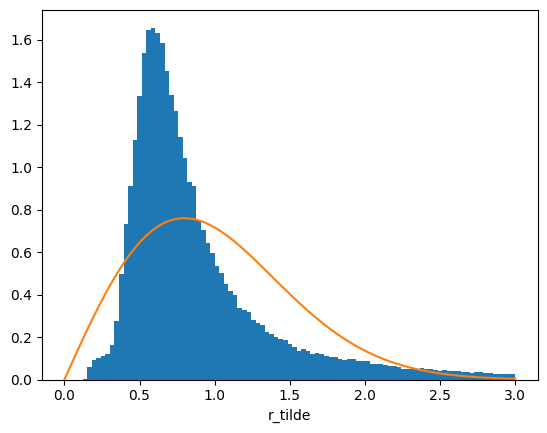

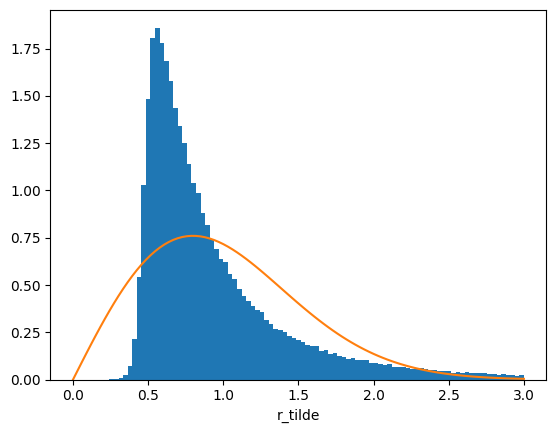

In [10]:
#plt.hist(z_list1, bins=20, density=True)
#plt.xlabel("r_tilde")
#plt.show()

#plt.hist(z_list2, bins=20, density=True)
#plt.xlabel("r_tilde")
#plt.show()
z_list1 = np.array(z_list1)
z_list2 = np.array(z_list2)
z_list1 = z_list1/np.mean(z_list1)
z_list2 = z_list2/np.mean(z_list2)

x_array = np.linspace(0,3,100)

def poisson(x):
    return np.pi/2 *x* np.exp(-np.pi/4 * x**2)

def ginUE(x):
    limit = 10
    k_list = np.arange(1, limit)
    gamma_list = []
    for k in k_list:
        gamma_list.append(gamma(k+1)*gammaincc(k+1, x**2))
    
    A = 1
    B = 1
    for k, g in zip(k_list, gamma_list):
        A *= g/np.math.factorial(k)
        B *= (2*x**(2*k+1)*np.exp(-x**2))/g

    return A*B

plt.hist(z_list1, bins=x_array , density=True)
plt.plot(x_array, poisson(x_array))
plt.xlabel("r_tilde")
plt.show()

plt.hist(z_list2, bins=x_array , density=True)
plt.plot(x_array, poisson(x_array))
plt.xlabel("r_tilde")
plt.show()

## Mean Global Spacing

In [10]:
n=4
d=2**n

U = circuit_to_matrix(integrable_circuit(n,n))
channel_target = DilutedKrausMap(U=U, c=0.9, kraus_part=KrausMap(d, rank=2))
spectrum = channel_spectrum(channel_target, use_coords=False, keep_real=False)

A = mean_spacing(spectrum)
print(A)

0.00903128058813291


(250, 1)


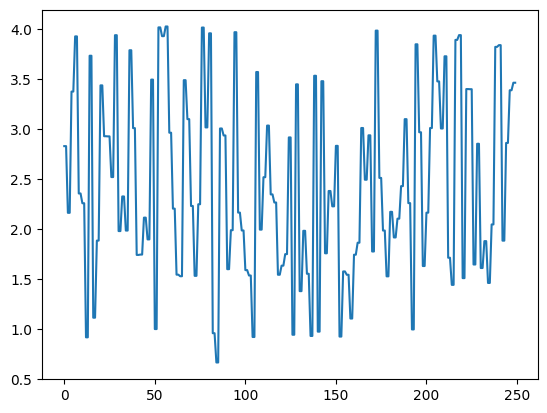

In [7]:
n=4
d=2**n
U = circuit_to_matrix(integrable_circuit(n,n))
channel_target = DilutedKrausMap(U=U, c=0.9, kraus_part=KrausMap(d, rank=2))
spectrum = channel_spectrum(channel_target, use_coords=False, keep_real=False)

print(spectrum.shape)
rho = unfolding(spectrum, sigma = 4.5*0.009)
plt.plot(rho)